In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

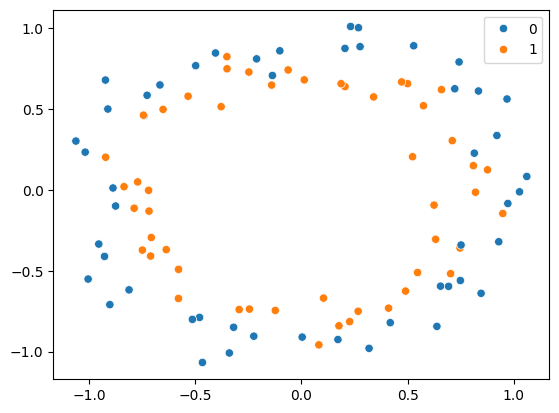

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [7]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\KIIT0001\Downloads\ANACON\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,verbose=0)

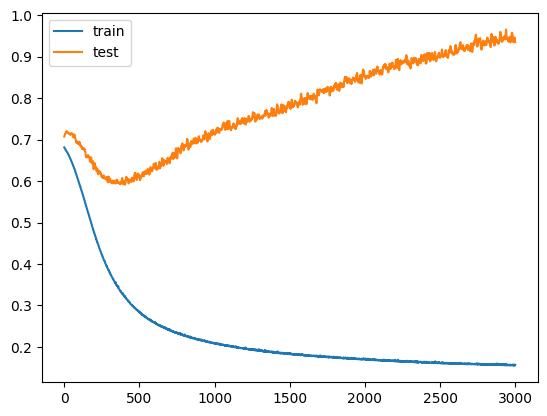

In [11]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step


<Axes: >

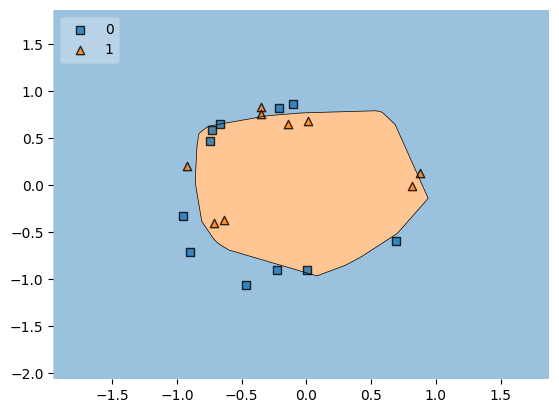

In [13]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)

# Early Stopping

In [23]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\KIIT0001\Downloads\ANACON\envs\ml\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [35]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3000, callbacks=callback)

Epoch 1/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5875 - loss: 0.6682 - val_accuracy: 0.3500 - val_loss: 0.7233
Epoch 2/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5875 - loss: 0.6673 - val_accuracy: 0.3500 - val_loss: 0.7230
Epoch 3/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5875 - loss: 0.6666 - val_accuracy: 0.3500 - val_loss: 0.7223
Epoch 4/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6000 - loss: 0.6660 - val_accuracy: 0.3500 - val_loss: 0.7208
Epoch 5/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6000 - loss: 0.6652 - val_accuracy: 0.3500 - val_loss: 0.7197
Epoch 6/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5875 - loss: 0.6649 - val_accuracy: 0.3500 - val_loss: 0.7187
Epoch 7/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.5750 - loss: 0.6640 - val_accuracy: 0.4000 - val_loss: 0.7176
Epoch 8/3000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5750 - loss: 0.6632 - val_accuracy: 0.4000 

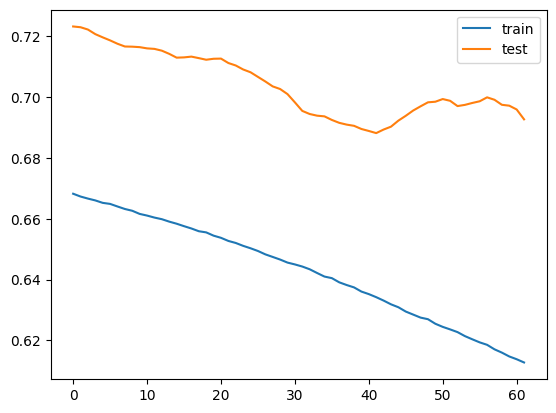

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step


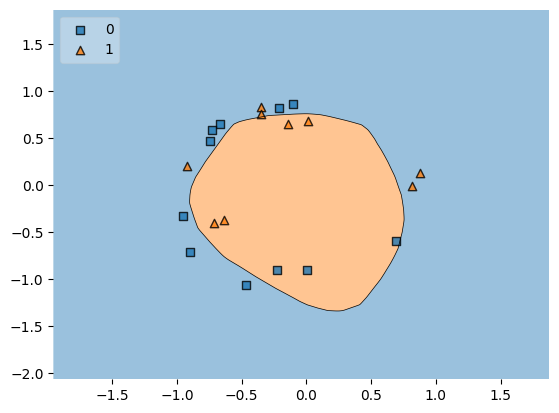

In [37]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()